In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [90]:
insurance_data=pd.read_csv("D:/data science projects/medical cost price predictions/insurance.csv")

In [91]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
insurance_data.isnull().sum().sum()

0

In [93]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [94]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


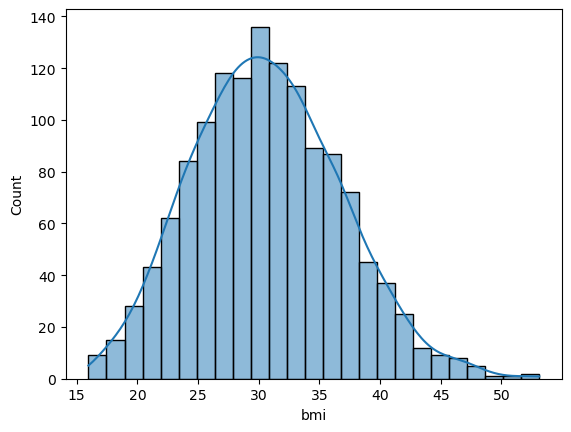

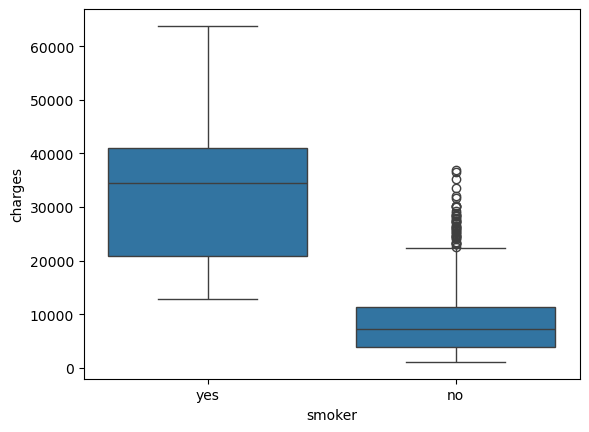

In [95]:
sns.histplot(insurance_data['bmi'], kde=True)  # Histogram of BMI with Kernel Density Estimate
plt.show()
sns.boxplot(x='smoker', y='charges', data=insurance_data)  # Boxplot for smoker vs. charges
plt.show()

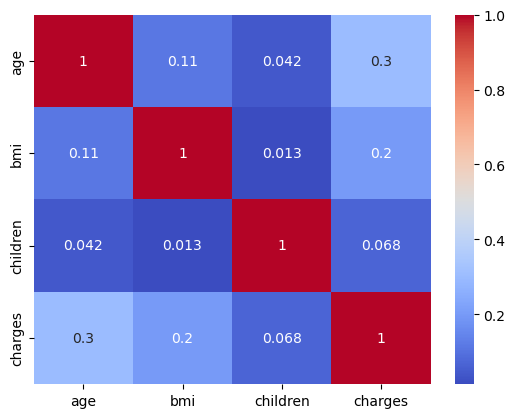

In [96]:
# Select only the numerical columns for correlation matrix
numerical_data = insurance_data.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



In [97]:
scaler = MinMaxScaler()
insurance_data[['age', 'bmi', 'charges']] = scaler.fit_transform(insurance_data[['age', 'bmi', 'charges']])


In [98]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.321227,0,yes,southwest,0.251611
1,0.000000,male,0.479150,1,no,southeast,0.009636
2,0.217391,male,0.458434,3,no,southeast,0.053115
3,0.326087,male,0.181464,0,no,northwest,0.333010
4,0.304348,male,0.347592,0,no,northwest,0.043816


In [99]:
numeric_columns = ['age', 'bmi', 'charges']
insurance_data[numeric_columns] = insurance_data[numeric_columns] + 1e-6
for col in numeric_columns:
    insurance_data[col], _ = stats.boxcox(insurance_data[col])


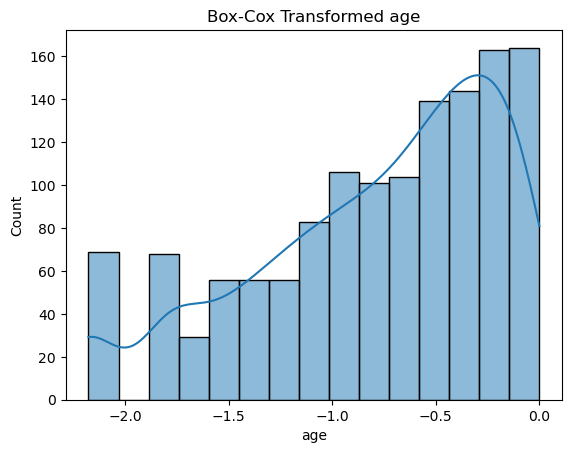

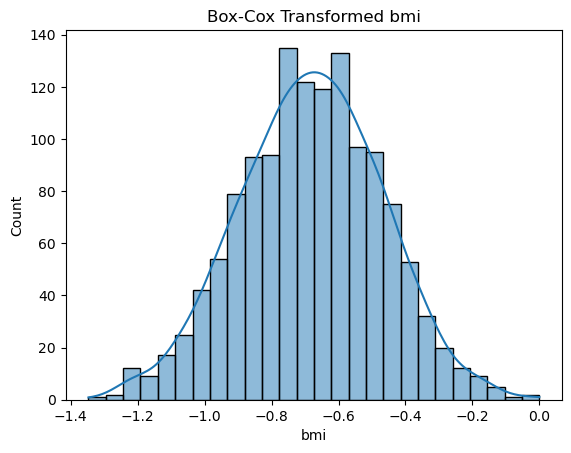

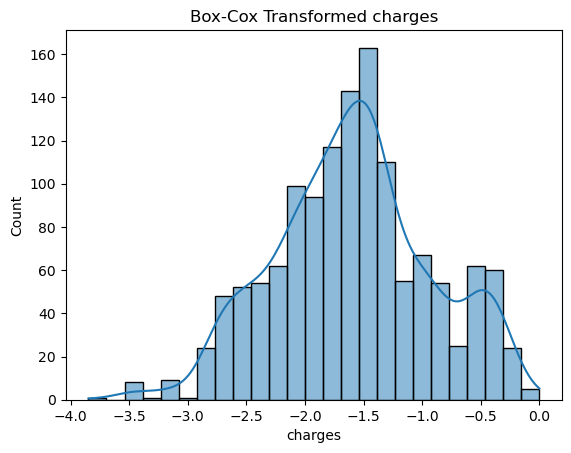

In [100]:
for col in numeric_columns:
    sns.histplot(insurance_data[col], kde=True)
    plt.title(f"Box-Cox Transformed {col}")
    plt.show()

In [101]:
insurance_data = pd.get_dummies(insurance_data, drop_first=True)

In [102]:
X = insurance_data.drop('charges', axis=1)  # All features except 'charges'
y = insurance_data['charges']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
RandomRegressor=RandomForestRegressor(random_state=0)

In [105]:
RandomRegressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [106]:
y_prediction=RandomRegressor.predict(X_test)

In [107]:
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_prediction)

# Output the results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 0.1404510441114034
MSE: 0.07186038594076008
RMSE: 0.2680678756224999
R²: 0.8486800542009859
